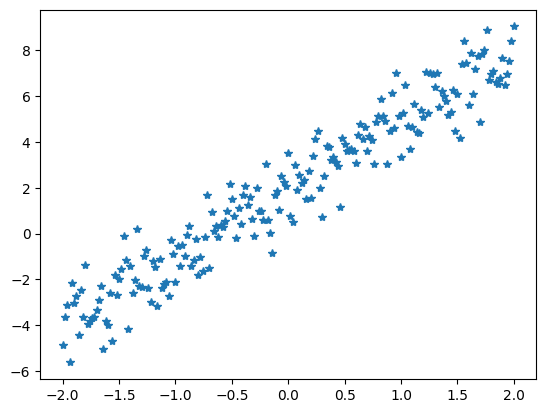

In [66]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [111]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest`
    """
)

result = query_job.result()

tensor = []

for row in result:
    # print(type(row.positions_member))
    if (type(row.positions_member) == str):
        tensor.append(json.loads(row.positions_member))

print(tensor[1400])

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
df['database'] = df['database'].fillna('[]')
df['database'] = ','.join(df['database'][0])
df['databases'] = df['databases'].fillna('[]')
df['databases'] = ','.join(df['databases'][0])
df['methodology'] = df['methodology'].fillna('[]')
df['methodology'] = ','.join(df['methodology'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
df.shape
# df.head()


{'codeLanguage': ['PHP', 'Laravel'], 'codeLanguageForProjectBriefView': ['PHP', 'Laravel'], 'database': ['Microsoft SQL Server'], 'databaseForProjectBriefView': ['Microsoft SQL Server'], 'expertise': 'Sênior', 'hourValue': 144, 'jobSpecifications': 'Temos um sistema que consiste em interface WEB e Mobile (Andoride), precismos corrigir 3 bugs na interface WEB, uma featura na interface WEB e um bug na interface mobile ', 'jobTitle': 'developer full-stack', 'methodology': [], 'methodologyForProjectBriefView': [], 'ongoingDate': {'_seconds': 1679686978, '_nanoseconds': 456000000}, 'skills': [], 'skillsForProjectBriefView': [], 'softwares': ['Github'], 'softwaresForProjectBriefView': ['Github'], 'totalHour': 20, 'wageMax': 80, 'wageMin': 50}


KeyError: ('codeLanguage', 'database', 'jobTitle', 'skills', 'softwares', 'hourValue')

In [115]:
df = df[['codeLanguage','database','jobTitle','skills','softwares', 'hourValue']]

In [116]:
df.shape

(1481, 6)

In [86]:
df.shape
ind = 0
for ks in df.values:
    for k in ks:
        if (type(k) == list):
            ind += 1
            print(df.columns[ind])

softwares
jobTitle
skills
codeLanguageForProjectBriefView
databaseForProjectBriefView
expertise
hourNetValue
hourValue
jobSpecifications
methodology
methodologyForProjectBriefView
skillsForProjectBriefView
softwaresForProjectBriefView
totalHour
wageMax
wageMin
ongoingDate._seconds
ongoingDate._nanoseconds
airtableRecordId
detailsEditorText
toBeReplaced
jobSpecificationsEditorText.blocks
codelanguage
codelanguageForProjectBriefView
jobSpecificationsEditorText
credits.consumed
credits.total
hours.total
detailsEditorText.blocks
contract
hiringModel
jobAffirmativeType
jobModel
jobModelReason
jobRequirements.description.blocks
jobRequirements.tags.codeLanguage
jobRequirements.tags.database
jobRequirements.tags.methodology
jobRequirements.tags.skills
jobRequirements.tags.softwares
jobResponsabilities.blocks
image
sentToStudyWise
isDeactivated
isPaymentBlocked
hours.consumed
jobSpecificationsEditorText.entityMap.0.data._map.data.targetOption
jobSpecificationsEditorText.entityMap.0.data._map.d

IndexError: index 86 is out of bounds for axis 0 with size 86

In [95]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 2000
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,16.000000000,14.000000000,15.000000000,14.000000000,73.000000000,14.000000000,None,BRL,48,...,80.000000000,80.000000000,80.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000,100.000000000,60.000000000
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,20.000000000,15.000000000,18.000000000,16.000000000,87.000000000,18.000000000,None,BRL,96,...,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,16.000000000,10.000000000,20.000000000,15.000000000,81.000000000,20.000000000,None,BRL,40,...,60.000000000,100.000000000,100.000000000,100.000000000,100.000000000,20.000000000,100.000000000,20.000000000,100.000000000,60.000000000


In [96]:
ks.shape

(2000, 40)

In [97]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,16.000000000,14.000000000,15.000000000,14.000000000,73.000000000,14.000000000,None,48,3.000000000,...,80.000000000,80.000000000,80.000000000,80.000000000,100.000000000,100.000000000,100.000000000,80.000000000,100.000000000,60.000000000
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,20.000000000,15.000000000,18.000000000,16.000000000,87.000000000,18.000000000,None,96,5.000000000,...,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,16.000000000,10.000000000,20.000000000,15.000000000,81.000000000,20.000000000,None,40,0E-9,...,60.000000000,100.000000000,100.000000000,100.000000000,100.000000000,20.000000000,100.000000000,20.000000000,100.000000000,60.000000000


In [98]:
ks.shape

(2000, 36)

In [99]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,developer front-end,júnior,full-time
1,ND,content creator,Júnior,Hora
2,BRL,tech lead,,part-time
3,ND,,ND,ND
4,BRL,developer front-end,júnior,full-time


In [100]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_EUR,wages_currency_ND,wages_currency_USD,experience_jobTitle_,experience_jobTitle_Grower,experience_jobTitle_ND,experience_jobTitle_account executive,experience_jobTitle_administrador de redes,experience_jobTitle_advogada,...,experience_level_selecione...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce', downcast="integer")
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_selecione...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,16,14,15,14,73,14,0,48.0,3,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,20,15,18,16,87,18,0,96.0,5,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,16,10,20,15,81,20,0,40.0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:

categ = pd.get_dummies(df, dtype=int)
categ.head()

,codeLanguage_React,database_,jobTitle_0,jobTitle_Agile coach,jobTitle_Data engineer,jobTitle_DevOps engineer,jobTitle_Developer back-end,jobTitle_Developer front-end,jobTitle_Developer full-stack,jobTitle_Developer mobile,...,hourValue_203,hourValue_215,hourValue_230,hourValue_240,hourValue_245,hourValue_250,hourValue_300,hourValue_500,hourValue_,"hourValue_39,37"
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
categ.shape

(1481, 167)

In [191]:
import numpy as np

new_dt = []
cols = []
# print(ks.values)
for i in range(1481):
    new_dt.append(ks.values)
    cols.append(str(i))

pd_ndt = np.array(new_dt)
print(pd_ndt.shape)


(1481, 2000, 126)


In [274]:
indexes = []
ind2 = []
for i in range(1481):
    indexes.append(i)
    ind2.append(i)

idex = np.array(indexes)
idex2 = np.array(ind2)
np.random.shuffle(idex)

np.random.shuffle(idex2)
print(idex2)
print(idex)


[  44 1235  536 ...  411 1368  347]
[410 763 324 ... 801 352 981]


In [201]:
idex.shape

(1481,)

[(None, 167), (None, 2000, 126)] (None, 2000)
Model: "model_29"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_20 (InputLayer)       [(None, 2000, 126)]          0         []                            
                                                                                                  
 dense_130 (Dense)           (None, 2000, 60)             7620      ['input_20[0][0]']            
                                                                                                  
 dense_131 (Dense)           (None, 2000, 15)             915       ['dense_130[0][0]']           
                                                                                                  
 dense_132 (Dense)           (None, 2000, 8)              128       ['dense_131[0][0]']           
                                             

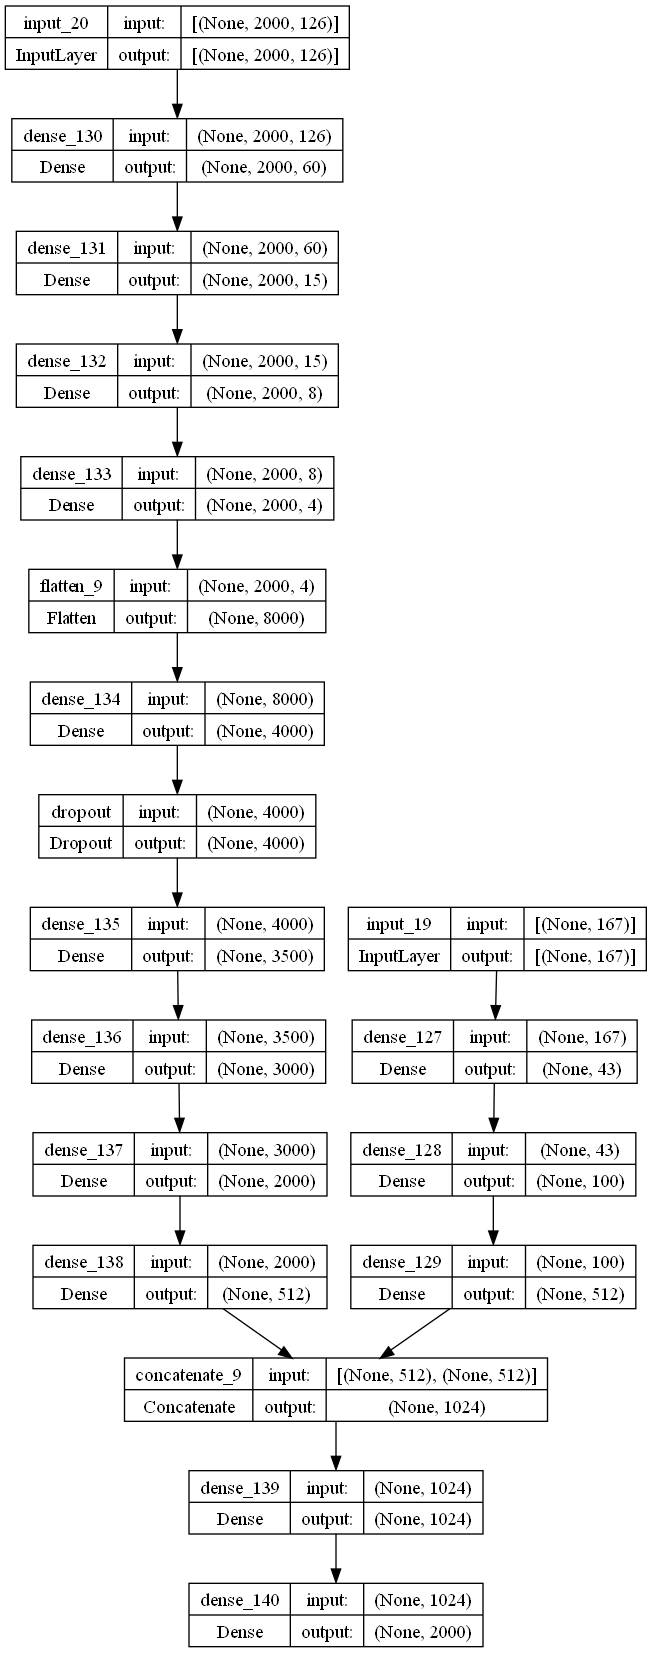

In [298]:
from tensorflow import keras

slot_input = keras.Input(shape=(167,))
pro_input = keras.Input(shape=(2000,126))

x = keras.layers.Dense(43, activation="relu") (slot_input)
x = keras.layers.Dense(100, activation="relu") (x)
x = keras.layers.Dense(512, activation="relu") (x)
x = keras.Model(inputs=slot_input, outputs=x)

y = keras.layers.Dense(60, activation="relu") (pro_input)
y = keras.layers.Dense(15, activation="relu") (y)
y = keras.layers.Dense(8, activation="relu") (y)
y = keras.layers.Dense(4, activation="relu") (y)
y = keras.layers.Flatten() (y)
y = keras.layers.Dense(4000, activation="relu") (y)
y = keras.layers.Dense(3500, activation="relu") (y)
y = keras.layers.Dense(3000, activation="relu") (y)
y = keras.layers.Dense(2000, activation="relu") (y)
y = keras.layers.Dense(512, activation="relu") (y)
y = keras.Model(inputs=pro_input, outputs=y)

combine = keras.layers.concatenate([x.output, y.output])

z = keras.layers.Dense(1024, activation="relu") (combine)
z = keras.layers.Dense(2000, activation="softmax") (z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

print(model.input_shape, model.output_shape)

model.compile(
      optimizer=keras.optimizers.Adam(1e-2),
      loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
      metrics=[keras.metrics.SparseCategoricalCrossentropy()]
)

model.summary()

keras.utils.plot_model(model, "first_model.png", True)

In [299]:
# dtst = keras.utils.to_categorical(dataset.choose_from_datasets(dataset, [0]), dtype="float32")
history = model.fit([categ, pd_ndt], idex, epochs=4, validation_data=([categ, pd_ndt], idex2))

Epoch 1/4


d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - ETA: 0s - loss: 1056.4114 - sparse_categorical_crossentropy: 1056.4114

d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 82s 2s/step - loss: 1056.4114 - sparse_categorical_crossentropy: 1056.4114 - val_loss: 7.5446 - val_sparse_categorical_crossentropy: 7.5446
Epoch 2/4
47/47 [==============================] - 54s 1s/step - loss: 7.5259 - sparse_categorical_crossentropy: 7.5259 - val_loss: 7.4682 - val_sparse_categorical_crossentropy: 7.4682
Epoch 3/4
47/47 [==============================] - 51s 1s/step - loss: 7.4669 - sparse_categorical_crossentropy: 7.4669 - val_loss: 7.4237 - val_sparse_categorical_crossentropy: 7.4237
Epoch 4/4
47/47 [==============================] - 50s 1s/step - loss: 7.4313 - sparse_categorical_crossentropy: 7.4313 - val_loss: 7.3953 - val_sparse_categorical_crossentropy: 7.3953


{'loss': [1056.411376953125, 7.525884628295898, 7.466926574707031, 7.4313483238220215], 'sparse_categorical_crossentropy': [1056.411376953125, 7.525884628295898, 7.466926574707031, 7.4313483238220215], 'val_loss': [7.544648170471191, 7.468179702758789, 7.423745155334473, 7.395269870758057], 'val_sparse_categorical_crossentropy': [7.544648170471191, 7.468179702758789, 7.423745155334473, 7.395269870758057]}
47/47 - 10s - loss: 7.3953 - sparse_categorical_crossentropy: 7.3953 - 10s/epoch - 206ms/step


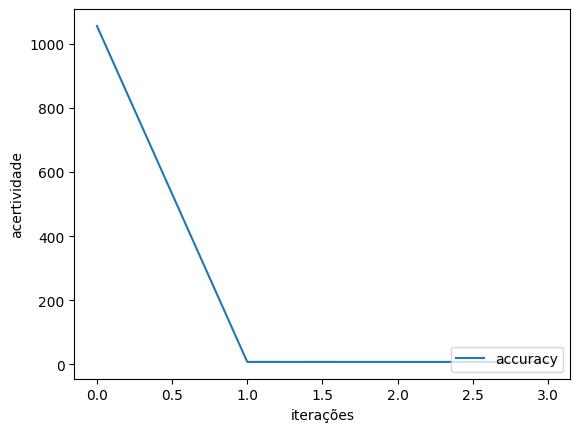

In [300]:
import matplotlib.pyplot as plt

print(history.history)
plt.plot(history.history['loss'], label='accuracy')
# plt.plot(history.history['logcosh'], label= 'logcosh')
plt.xlabel('iterações')
plt.ylabel('acertividade')
# plt.ylim([1,10])
plt.legend(loc='lower right')

test_loss, test_acc, *outros = model.evaluate([categ, pd_ndt], idex, verbose=2)

In [301]:
test = categ.iloc[:4]
print(test.shape)
# mt = np.matrix([pd_ndt[0]])
# print(mt.shape)
side = np.array([pd_ndt[0], pd_ndt[0], pd_ndt[0], pd_ndt[0]])

predition = model.predict([test, side])

(4, 167)
1/1 [==============================] - 1s 1s/step


In [308]:
candidate_index = np.argmax(predition[0])
varia = predition[1]
print(predition[0][candidate_index], candidate_index)

0.0007246179 853


In [310]:
print(df.iloc[candidate_index]['jobTitle'])
strData.iloc[candidate_index]['experience_jobTitle']

developer front-end


''